In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

file_path = '../Electric_Vehicle_Data.csv'
ev_df = pd.read_csv(file_path)

In [2]:
ev_df.shape

(181458, 17)

In [3]:
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [5]:
columns = list(ev_df.columns)

In [6]:
ev_df.nunique()

VIN (1-10)                                            11060
County                                                  193
City                                                    726
State                                                    44
Postal Code                                             871
Model Year                                               22
Make                                                     40
Model                                                   143
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          103
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       181458
Vehicle Location                                        870
Electric Utility                                         76
2020 Census Tract                       

In [7]:
for col in columns:
    print(ev_df[col].value_counts())
    print("\n")

VIN (1-10)
7SAYGDEE6P    1244
7SAYGDEE7P    1242
7SAYGDEE8P    1199
7SAYGDEE5P    1191
7SAYGDEEXP    1184
              ... 
JTMAAAAAXP       1
3FA6P0WU5L       1
WP1AE2AYXN       1
5YJXCDE42M       1
SALGS4RY7L       1
Name: count, Length: 11060, dtype: int64


County
King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: count, Length: 193, dtype: int64


City
Seattle        30045
Bellevue        9117
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Champaign          1
Chevy Chase        1
Alderdale          1
Austin             1
Herndon            1
Name: count, Length: 726, dtype: int64


State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL  

In [8]:
null_values = ev_df.isnull().sum()
zero_values = (ev_df == 0).sum()

result = pd.DataFrame({'Null Values': null_values, 'Zero Values': zero_values})

print(result)

                                                   Null Values  Zero Values
VIN (1-10)                                                   0            0
County                                                       3            0
City                                                         3            0
State                                                        0            0
Postal Code                                                  3            0
Model Year                                                   0            0
Make                                                         0            0
Model                                                        0            0
Electric Vehicle Type                                        0            0
Clean Alternative Fuel Vehicle (CAFV) Eligibility            0            0
Electric Range                                               0        94730
Base MSRP                                                    0       178146
Legislative 

## Attribute Removal

1. VIN (1-10) has 11060 unique values, which implies it is highly specific, should be removed.
2. DOL Vehicle ID has 181458 unique values, which implies it is highly specific, should be removed.
3. 2020 Census Tract has 2124 unique values as this is quite specific, should be removed.
4. City, Postal Code: The small number of null values might be negligible, but for generalization we can remove these attributes, especially if other geographic identifiers (like State) are retained and also unique values in this are quite more.
5. Base MSRP: has a significant number of zero values, which could indicate either missing data or a large portion of data where the MSRP wasn't recorded.
6. Electric Range: has a significant number of zero values, which might suggest that this data isn't useful for some vehicles.


In [9]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [10]:
attributes_to_remove = ['VIN (1-10)', 'City','State', 'Postal Code', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', '2020 Census Tract']  

ev_df_modified = ev_df.drop(columns=attributes_to_remove)

ev_df_modified.head()

,County,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,King,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Thurston,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC
2,Thurston,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
3,Thurston,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC
4,Yakima,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP


### Attribute Generalization

1. Model year: We can generalize Model Year based on decades such as 1990s, 2000s, 2010s, 2020s

In [11]:
ev_df['Model Year'].unique()

array([2017, 2018, 2021, 2020, 2023, 2022, 2015, 2013, 2019, 2014, 2016,
       2024, 2011, 2012, 2010, 2008, 2000, 2002, 1998, 1997, 1999, 2003])

In [12]:
def categorize_model_year(year):
    if 1990 <= year <= 1999:
        return '1990s'
    elif 2000 <= year <= 2009:
        return '2000s'
    elif 2010 <= year <= 2019:
        return '2010s'
    elif 2020 <= year:
        return '2020s'

In [13]:
ev_df_modified['Model Year Category'] = ev_df_modified['Model Year'].apply(categorize_model_year)

In [14]:
ev_df_modified = ev_df_modified.drop(columns=['Model Year'])

In [15]:
ev_df_modified.head()

,County,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Model Year Category
0,King,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2010s
1,Thurston,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC,2010s
2,Thurston,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC,2010s
3,Thurston,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC,2020s
4,Yakima,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP,2020s


In [16]:
generalized_ev_df = ev_df_modified.groupby(['County','Model Year Category','Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']).size().reset_index(name='Count')

generalized_ev_df.head(10)


,County,Model Year Category,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Count
0,Ada,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NON WASHINGTON STATE ELECTRIC UTILITY,2
1,Adams,2010s,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,3
2,Adams,2010s,FORD,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,4
3,Adams,2010s,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,2
4,Adams,2010s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,3
5,Adams,2020s,BMW,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,1
6,Adams,2020s,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,1
7,Adams,2020s,CADILLAC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,1
8,Adams,2020s,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,3
9,Adams,2020s,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,AVISTA CORP,1


In [17]:
def generate_characteristic_rule(row):
    return (
        f"In {row['County']} County, during the {row['Model Year Category']}, the {row['Make'].title()} models "
        f"are often {row['Electric Vehicle Type']} and are typically {row['Clean Alternative Fuel Vehicle (CAFV) Eligibility']}. "
        f"This vehicle is usually associated with {row['Electric Utility'].title()} as the electric utility provider."
    )

In [18]:
generalized_ev_df['Characteristic Rule'] = generalized_ev_df.apply(generate_characteristic_rule, axis=1)

In [19]:
generalized_ev_df_sorted = generalized_ev_df.sort_values(by='Count',ascending=False)

In [20]:
generalized_ev_df_sorted.head(10)

,County,Model Year Category,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Count,Characteristic Rule
1505,King,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22763,"In King County, during the 2020s, the Tesla mo..."
1500,King,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),8480,"In King County, during the 2020s, the Tesla mo..."
3211,Snohomish,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC,7826,"In Snohomish County, during the 2020s, the Tes..."
1327,King,2010s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),7274,"In King County, during the 2010s, the Tesla mo..."
1324,King,2010s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2956,"In King County, during the 2010s, the Tesla mo..."
543,Clark,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,2953,"In Clark County, during the 2020s, the Tesla m..."
1315,King,2010s,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2564,"In King County, during the 2010s, the Nissan m..."
1497,King,2020s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2545,"In King County, during the 2020s, the Tesla mo..."
1313,King,2010s,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2270,"In King County, during the 2010s, the Nissan m..."
2688,Pierce,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,2085,"In Pierce County, during the 2020s, the Tesla ..."


In [21]:
generalized_ev_df_sorted['Characteristic Rule'][4]

'In Adams County, during the 2010s, the Tesla models are often Battery Electric Vehicle (BEV) and are typically Clean Alternative Fuel Vehicle Eligible. This vehicle is usually associated with Bonneville Power Administration||Avista Corp||Big Bend Electric Coop, Inc as the electric utility provider.'

### BUC

In [22]:
ev_df_clean = generalized_ev_df_sorted.drop(columns=['Characteristic Rule'])

In [23]:
ev_df_clean.head(10)

,County,Model Year Category,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Count
1505,King,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22763
1500,King,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),8480
3211,Snohomish,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC,7826
1327,King,2010s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),7274
1324,King,2010s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2956
543,Clark,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,2953
1315,King,2010s,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2564
1497,King,2020s,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2545
1313,King,2010s,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2270
2688,Pierce,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,2085


### BUC In-memory

In [24]:
# Helper functions

results = []

def project_data(input, d):
    return input.iloc[:, d]

def select_data(input, d, val):
    col_name = input.columns[d]
    return input[input[col_name] == val]

def remove_first_dim(input):
    return input.iloc[:, 1:]

def slice_data_dim0(input, v):
    return remove_first_dim(select_data(input, 0, v))

def store_result(val):
    results.append(val)


In [25]:
def buc_rec(input, prefix=[]):
    dims = input.shape[1]
    
    if dims == 1:
        input_sum = sum(project_data(input, 0))
        store_result(prefix + ['*'] * (len(input.columns) - len(prefix)) + [input_sum])
    else:
        dim0_vals = set(project_data(input, 0).values)
        
        for dim0_v in dim0_vals:
            sub_data = slice_data_dim0(input, dim0_v)
            buc_rec(sub_data, prefix + [dim0_v])
        
        sub_data = remove_first_dim(input)
        buc_rec(sub_data, prefix + ['*'])


In [26]:
results.clear()

buc_rec(ev_df_clean)

In [27]:
columns = list(ev_df_clean.columns[:-1]) + ['Count']
output_rec_df = pd.DataFrame(results, columns=columns)

In [28]:
output_rec_df

,County,Model Year Category,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Count
0,Hamilton,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NON WASHINGTON STATE ELECTRIC UTILITY,1
1,Hamilton,2020s,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,*,1
2,Hamilton,2020s,TESLA,Battery Electric Vehicle (BEV),*,NON WASHINGTON STATE ELECTRIC UTILITY,1
3,Hamilton,2020s,TESLA,Battery Electric Vehicle (BEV),*,*,1
4,Hamilton,2020s,TESLA,*,Eligibility unknown as battery range has not b...,NON WASHINGTON STATE ELECTRIC UTILITY,1
...,...,...,...,...,...,...,...
71764,*,*,*,*,*,CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP,256
71765,*,*,*,*,*,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF A...,1
71766,*,*,*,*,*,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,722
71767,*,*,*,*,*,CITY OF SEATTLE - (WA),1


### BUC optimized

In [29]:
def buc_optimized(input, prefix=[], min_support=1):
    dims = input.shape[1]
    
    if dims == 1:
        # Base case: If there is only one column, calculate the sum
        input_sum = input.iloc[:, 0].sum()
        if input_sum >= min_support:
            store_result(prefix + [input_sum])
    else:
        dim0_vals = set(project_data(input, 0))
        
        for dim0_v in dim0_vals:
            sub_data = select_data(input, 0, dim0_v)
            
            # Optimization: Early Pruning based on the count or sum
            sub_sum = sub_data.iloc[:, -1].sum()
            if sub_sum >= min_support and len(sub_data) > 0:
                buc_optimized(remove_first_dim(sub_data), prefix + [dim0_v], min_support)
        
        # Wildcard case ('*')
        total_sum = input.iloc[:, -1].sum()
        if total_sum >= min_support:
            buc_optimized(remove_first_dim(input), prefix + ['*'], min_support)

In [30]:
min_support_value = 10000

In [31]:
results.clear()

buc_optimized(ev_df_clean, min_support=min_support_value)

In [32]:
columns = list(ev_df_clean.columns[:-1]) + ['Count']
output_df = pd.DataFrame(results, columns=columns)

In [33]:
output_df

,County,Model Year Category,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Count
0,Clark,*,*,*,*,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,10420
1,Clark,*,*,*,*,*,10675
2,Snohomish,2020s,*,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC,11920
3,Snohomish,2020s,*,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,*,12450
4,Snohomish,2020s,*,Battery Electric Vehicle (BEV),*,PUGET SOUND ENERGY INC,13061
...,...,...,...,...,...,...,...
189,*,*,*,*,*,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),32012
190,*,*,*,*,*,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),67180
191,*,*,*,*,*,PUGET SOUND ENERGY INC,36705
192,*,*,*,*,*,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,10420


### Analysis

In [34]:
import time

min_sup = [1, 10, 50, 100, 500, 1000, 5000, 10000]

runtimes = []
buc_results = []
num_cubes = []

for sup in min_sup:
    results.clear()
    start_time = time.time()
    buc_optimized(ev_df_clean, min_support=sup)
    end_time = time.time()
    buc_results.append(results)
    num_cubes.append(len(results))
    runtimes.append(end_time - start_time)

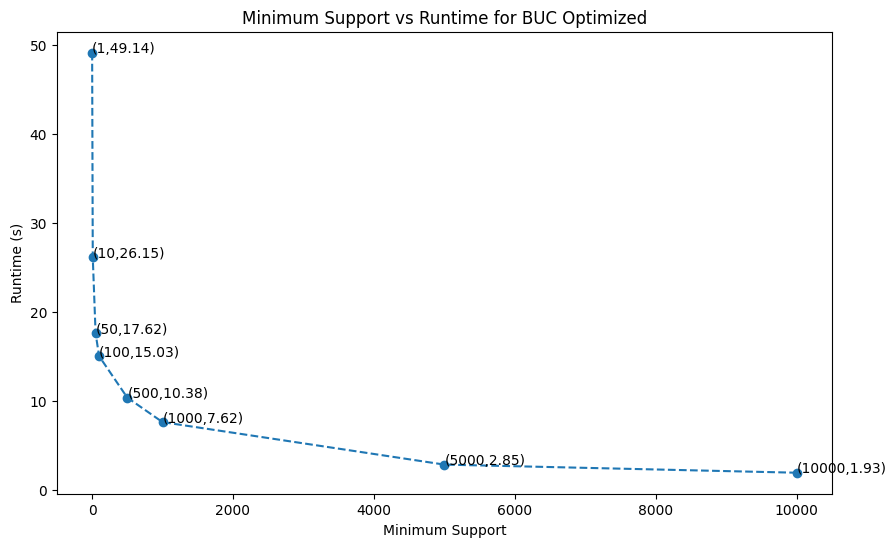

In [35]:
# plot min support vs runtime for buc_optimized
plt.figure(figsize=(10, 6))
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (s)')
plt.title('Minimum Support vs Runtime for BUC Optimized')
plt.plot(min_sup, runtimes, marker='o',ls='--')

for i in range(len(min_sup)):
    plt.annotate(f'({min_sup[i]},{round(runtimes[i],2)})', (min_sup[i], runtimes[i]))

plt.show()

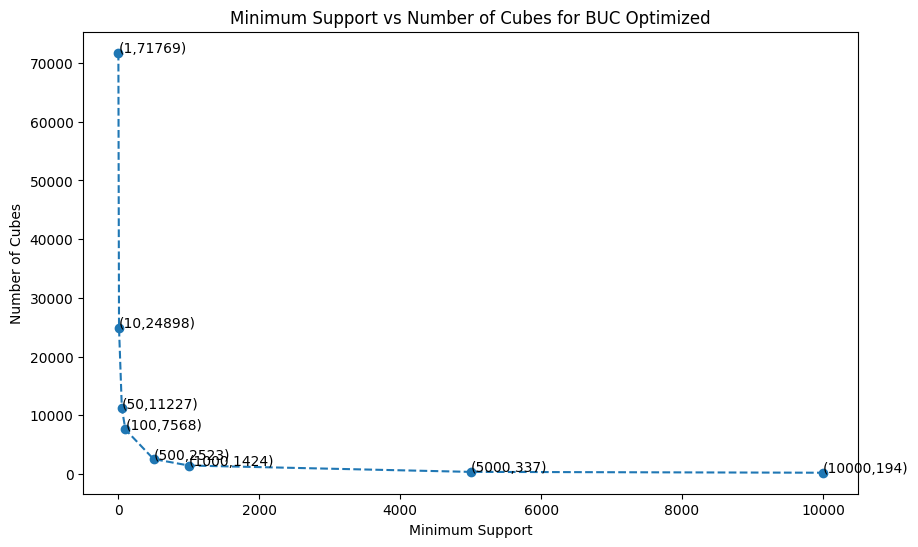

In [36]:
# plot min support vs number of cubes for buc_optimized
plt.figure(figsize=(10, 6))
plt.xlabel('Minimum Support')
plt.ylabel('Number of Cubes')
plt.title('Minimum Support vs Number of Cubes for BUC Optimized')
plt.plot(min_sup, num_cubes, marker='o',ls='--')
for i in range(len(min_sup)):
    plt.annotate(f'({min_sup[i]},{num_cubes[i]})', (min_sup[i], num_cubes[i]))
plt.show()

### Insights

1. We can see that as we increase minimum support the run time decreased.
2. We can also see that number of cubes decrease with increase in minimum support
3. Minimum support = 1, is straight-forward implementation of without optimisation

## Comparision between BUC and AOI

### A. Primary purposes and use cases

1. The BUC method is useful here if we are aggregating data across multiple dimensions such as county, make, model year, etc. For example, We want analyze the total number of electric vehicles per make across different states or regions, which is typical of OLAP cube computations.
2. AOI is useful if we wanted to generalize the dataset to higher-level categories, such as summarizing year into decades. This would help reduce the complexity of the dataset for further analysis.

### B. Types of Insights or Patterns

1. With BUC, we can have aggregate patterns such as the distribution of electric vehicles by County or State, how different manufacturers compare in terms of the number of vehicles sold, or the correlation between CAFV eligibilty and vehicle make across different regions.
2. AOI focuses on identifying higher-level insights like overall trends in electric vehicle adoption or generalized patterns regarding the type of electric vehicles that are most common in different regions. It focuses more on abstraction rather than detailed aggregation.

### C. Computational Efficiency and Scalability

1. Here, BUC will be able to efficiently aggregate across multiple dimensions, and it would scale well to large datasets since it can prune irrelevant aggregations. This makes BUC well-suited for quick, multi-dimensional summaries.
2. AOI requires scanning through the entire dataset to generalize values. While it may be slower in large datasets compared to BUC, it simplifies the data by reducing the dimensionality from attribute removal and producing more abstract insights.

### D. Interpretabilty of Results

1. The results from BUC would be easy to interpret as they provide direct, multi-dimensional aggregates like "total electric vehicles by Make and County." For example, if we want to know how many vehicles Audi sold in each County, BUC gives direct answer.
2. AOI results require more domain knowledge to interpret as they generalize data. However, the summarization could make the overall trends more apparent. For instance, we might generalize all electric vehicles into one category to see which states are leading in electric vehicle adoption.

### E. Scenarios where one might be preferred over other

1. BUC is preferred if we need detailed, dimension-specific aggregates. For example, understanding how many vehicles were sold in a specific County by year and make.
2. AOI is preferred when we need to reduce the complexity of the data or focus on high-level trends. For example, summarizing vehicle makes into categories like "luxury" or "economy" based on price and studying across regions.
